## Amsterdam Data Project
Meenu Ravi

#### Import Statements

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
from matplotlib import pyplot as plt
import math
from collections import defaultdict 
from operator import itemgetter 
from itertools import groupby
import seaborn as sns
from matplotlib.pyplot import figure
import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from patsy import dmatrices

import statsmodels.api as sm
%matplotlib inline
pd.set_option('display.max_columns', None)

#### Read in Data file

In [103]:
data=pd.read_csv("listings.csv")
data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210208155251,2021-02-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",NaN,NaN,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36575,4.94142,Private room in apartment,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Hangers"", ""Coffee maker"", ""Paid parking on p...",$59.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,29,46,60,139,2021-02-11,278,1,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,1,0,1,0,1.92
1,20168,https://www.airbnb.com/rooms/20168,20210208155251,2021-02-11,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",+ (Phone number hidden by Airbnb),NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36509,4.89354,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Han...",$129.00,1,365,1.0,4.0,60.0,1125.0,3.8,413.8,NaN,t,0,0,0,0,2021-02-11,339,19,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,t,2,0,2,0,2.54
2,25428,https://www.airbnb.com/rooms/25428,20210208155251,2021-02-10,"Lovely, spacious 1 bed apt in Center(with lift)",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States","We are a retired couple who live in NYC, and h...",NaN,NaN,0%,t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,NaN,Centrum-West,NaN,52.37297,4.88339,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Hangers"", ""Elevator"", ""Cooking basics"", ""Dis...",$125.00,14,180,14.0,14.0,180

#### Data Exploration and Cleansing
I look at the number of rows, the number of columns: 18291 rows and 74 columns \
I look at the type of each column: they are mostly ints and object types\
By describing the data, I take a look at the statistics of the listings data\

Limitations:
- there is dirty data 

Assumptions
- I am assuming which columns I believe are necessary
- I am assuming I only need certain variables
- I am assuming that amenities like dove soap and l'oreal soap are the same in the category toiletries

Repercussions
- Some columns I deleted may not be the best idea
- How I handle categorical values may not be best

In [104]:
#Checking the number of rows and columns of the df
print("Dimension of listings df:", data.shape)

Dimension of listings df: (18291, 74)


In [105]:
#Looking at the data types and info of listings
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18291 entries, 0 to 18290
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18291 non-null  int64  
 1   listing_url                                   18291 non-null  object 
 2   scrape_id                                     18291 non-null  int64  
 3   last_scraped                                  18291 non-null  object 
 4   name                                          18258 non-null  object 
 5   description                                   17994 non-null  object 
 6   neighborhood_overview                         12023 non-null  object 
 7   picture_url                                   18291 non-null  object 
 8   host_id                                       18291 non-null  int64  
 9   host_url                                      18291 non-null 

In [106]:
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.829100e+04,1.829100e+04,1.829100e+04,18228.000000,18228.000000,0.0,18291.000000,18291.000000,18291.000000,0.0,17294.000000,18186.000000,18291.000000,18291.000000,18288.000000,18288.000000,18288.000000,1.828800e+04,18288.000000,1.828800e+04,0.0,18291.000000,18291.000000,18291.000000,18291.000000,18291.000000,18291.000000,18291.000000,15659.000000,15649.000000,15649.000000,15641.000000,15648.000000,15643.000000,15643.000000,0.0,18291.000000,18291.000000,18291.000000,18291.000000,15902.000000
mean,2.064229e+07,2.021021e+13,6.705998e+07,3.244459,3.244459,NaN,52.365478,4.889504,2.837570,NaN,1.534405,1.765259,3.727407,611.559565,3.683454,3.861494,688.285652,2.355498e+05,3.768269,2.350138e+05,NaN,5.950467,12.473621,19.262315,61.923132,24.125198,1.520147,0.023892,95.107287,9.690907,9.457857,9.750911,9.794926,9.513456,9.202071,NaN,2.647477,2.111366,0.476628,0.009404,0.591448
std,1.285836e+07,0.000000e+00,8.666877e+07,56.575963,56.575963,NaN,0.016559,0.035833,1.282434,NaN,0.959211,1.444775,16.331468,545.438112,16.287296,16.389708,536.932318,2.245690e+07,16.347635,2.240609e+07,NaN,11.195839,22.753660,34.282051,115.602325,54.560889,6.552857,0.260227,7.035600,0.728646,0.914985,0.659262,0.636390,0.705519,0.832326,NaN,8.724302,8.545412,1.457147,0.153398,1.065085
min,2.818000e+03,2.021021e+13,3.159000e+03,0.000000,0.000000,NaN,52.289270,4.755940,0.000000,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.010732e+07,2.021021e+13,9.282300e+06,1.000000,1.000000,NaN,52.355100,4.863920,2.000000,NaN,1.000000,1.000000,2.000000,21.000000,2.000000,2.000000,28.000000,2.800000e+01,2.000000,2.800000e+01,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.130000
50%,1.911168e+07,2.021021e+13,2.810956e+07,1.000000,1.000000,NaN,52.364790,4.887010,2.000000,NaN,1.000000,1.000000,2.000000,1125.000000,2.000000,2.000000,1125.000000,1.125000e+03,2.000000,1.125000e+03,NaN,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.280000
75%,3.039472e+07,2.021021e+13,8.650474e+07,1.000000,1.000000,NaN,52.375370,4.909230,4.000000,NaN,2.000000,2.000000,3.000000,1125.000000,3.000000,3.000000,1125.000000,1.125000e+03,3.000000,1.125000e+03,NaN,0.000000,9.000000,18.000000,78.000000,22.000000,1.000000,0.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.580000
max,4.807786e+07,2.021021e+13,3.871652e+08,7235.000000,7235.000000,NaN,52.425120,5.027690,16.000000,NaN,50.000000,35.000000,1001.000000,11250.000000,1001.000000,1001.000000,11250.000000,2.147484e+09,1001.000000,2.142625e+09,NaN,30.000000,60.000000,90.000000,365.000000,859.000000,380.000000,10.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,N

Next, I take a look at which columns have null values and how many null values \
I ordered it from least to greatest amount of null values so that it is easier to visualize

In [107]:
#Display the columns with their respective number of na values
listingColumns=data.columns
nulls=[]
for i in listingColumns:
    if(data[i].isna().sum()>0):
        nulls.append((i,data[i].isna().sum()))
sorted(nulls, key=lambda x: x[1])

[('minimum_minimum_nights', 3),
 ('maximum_minimum_nights', 3),
 ('minimum_maximum_nights', 3),
 ('maximum_maximum_nights', 3),
 ('minimum_nights_avg_ntm', 3),
 ('maximum_nights_avg_ntm', 3),
 ('bathrooms_text', 22),
 ('name', 33),
 ('host_name', 63),
 ('host_since', 63),
 ('host_is_superhost', 63),
 ('host_thumbnail_url', 63),
 ('host_picture_url', 63),
 ('host_listings_count', 63),
 ('host_total_listings_count', 63),
 ('host_has_profile_pic', 63),
 ('host_identity_verified', 63),
 ('host_location', 92),
 ('beds', 105),
 ('description', 297),
 ('bedrooms', 997),
 ('first_review', 2389),
 ('last_review', 2389),
 ('reviews_per_month', 2389),
 ('review_scores_rating', 2632),
 ('review_scores_accuracy', 2642),
 ('review_scores_cleanliness', 2642),
 ('review_scores_communication', 2643),
 ('review_scores_location', 2648),
 ('review_scores_value', 2648),
 ('review_scores_checkin', 2650),
 ('host_neighbourhood', 6134),
 ('neighborhood_overview', 6268),
 ('neighbourhood', 6268),
 ('host_about

Now, I plot this, to see the spread of the data and see which columns have the most null values\
I see a lot of the review scores have medium amount of null values whereas the avg ltm ntm have a lot of nulls

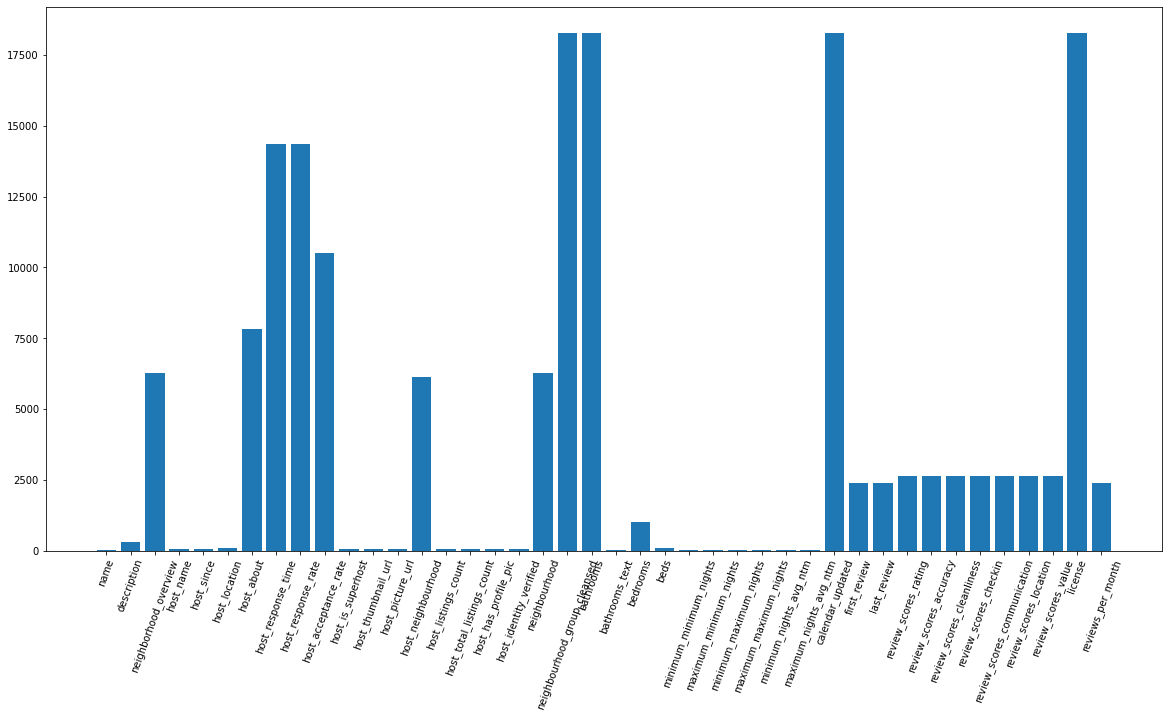

In [108]:
#Visualize the spread of na and see which columns have the most na
plt.figure(figsize=(20,10))
plt.bar(range(len(nulls)), [val[1] for val in nulls], align='center')
plt.xticks(range(len(nulls)), [val[0] for val in nulls])
plt.xticks(rotation=70)
plt.show()

I decided to remove columns that have 33% or 1/3 of the data missing. I decided to do this because a third is a significant amount of data and it won't make sense to use any other method of rectifying the nulls and still maintain accuracy.

In [109]:
#Look at what percent of each column is null
nullsPercents=[]
for i in listingColumns:
    if(data[i].isna().sum()>0):
        nullsPercents.append((i,(data[i].isna().sum()/len(data))*100))
sorted(nullsPercents, key=lambda x: x[1])

[('minimum_minimum_nights', 0.01640150893882237),
 ('maximum_minimum_nights', 0.01640150893882237),
 ('minimum_maximum_nights', 0.01640150893882237),
 ('maximum_maximum_nights', 0.01640150893882237),
 ('minimum_nights_avg_ntm', 0.01640150893882237),
 ('maximum_nights_avg_ntm', 0.01640150893882237),
 ('bathrooms_text', 0.12027773221803073),
 ('name', 0.1804165983270461),
 ('host_name', 0.3444316877152698),
 ('host_since', 0.3444316877152698),
 ('host_is_superhost', 0.3444316877152698),
 ('host_thumbnail_url', 0.3444316877152698),
 ('host_picture_url', 0.3444316877152698),
 ('host_listings_count', 0.3444316877152698),
 ('host_total_listings_count', 0.3444316877152698),
 ('host_has_profile_pic', 0.3444316877152698),
 ('host_identity_verified', 0.3444316877152698),
 ('host_location', 0.5029796074572195),
 ('beds', 0.5740528128587831),
 ('description', 1.6237493849434146),
 ('bedrooms', 5.450768137335301),
 ('first_review', 13.061068284948881),
 ('last_review', 13.061068284948881),
 ('revie

In [110]:
#Remove columns with more than a third of the data missing because it will not provide much value to analysis
more_than_third_missing = [i[0].strip('\n') for i in nullsPercents if i[1]>= 33.33]
cleanedData= data.copy()
for cols in more_than_third_missing:
    del cleanedData[cols]
cleanedData.head()

,id,listing_url,scrape_id,last_scraped,name,description,picture_url,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210208155251,2021-02-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,1.5 shared baths,1.0,2.0,"[""Hangers"", ""Coffee maker"", ""Paid parking on p...",$59.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,t,29,46,60,139,2021-02-11,278,1,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,t,1,0,1,0,1.92
1,20168,https://www.airbnb.com/rooms/20168,20210208155251,2021-02-11,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Centrum-Oost,52.36509,4.89354,Private room in townhouse,Private room,2,1 private bath,1.0,1.0,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Han...",$129.00,1,365,1.0,4.0,60.0,1125.0,3.8,413.8,t,0,0,0,0,2021-02-11,339,19,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,t,2,0,2,0,2.54
2,25428,https://www.airbnb.com/rooms/25428,20210208155251,2021-02-10,"Lovely, spacious 1 bed apt in Center(with lift)",Lovely apt in Centre ( lift & fireplace) near ...,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States",t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,2.0,2.0,"['email', 'phone', 'reviews']",t,f,Centrum-West,52.37297,4.88339,Entire apartment,Entire home/apt,3,1 bath,1.0,1.0,"[""Hangers"", ""Elevator"", ""Cooking basics"", ""Dis...",$125.00,14,180,14.0,14.0,180.0,180.0,14.0,180.0,t,6,36,66,251,2021-02-10,5,0,0,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0,0.13
3,27886,https://www.airbnb.com/rooms/27886,20210208155251,2021-02-11,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",t,https://a0.muscache.com/im/users/97647/profile...,https://a0.muscache.com/im/users/97647/profile...,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Centrum-West,52.38761,4.

In [111]:
listingColumns=cleanedData.columns
nulls=[]
for i in listingColumns:
    if(cleanedData[i].isna().sum()>0):
        nulls.append((i,cleanedData[i].isna().sum()))
sorted(nulls, key=lambda x: x[1])

[('minimum_minimum_nights', 3),
 ('maximum_minimum_nights', 3),
 ('minimum_maximum_nights', 3),
 ('maximum_maximum_nights', 3),
 ('minimum_nights_avg_ntm', 3),
 ('maximum_nights_avg_ntm', 3),
 ('bathrooms_text', 22),
 ('name', 33),
 ('host_name', 63),
 ('host_since', 63),
 ('host_is_superhost', 63),
 ('host_thumbnail_url', 63),
 ('host_picture_url', 63),
 ('host_listings_count', 63),
 ('host_total_listings_count', 63),
 ('host_has_profile_pic', 63),
 ('host_identity_verified', 63),
 ('host_location', 92),
 ('beds', 105),
 ('description', 297),
 ('bedrooms', 997),
 ('first_review', 2389),
 ('last_review', 2389),
 ('reviews_per_month', 2389),
 ('review_scores_rating', 2632),
 ('review_scores_accuracy', 2642),
 ('review_scores_cleanliness', 2642),
 ('review_scores_communication', 2643),
 ('review_scores_location', 2648),
 ('review_scores_value', 2648),
 ('review_scores_checkin', 2650)]

In [112]:
listingColumns=cleanedData.columns
listingColumns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
 

In [113]:
cleanedData.head()

,id,listing_url,scrape_id,last_scraped,name,description,picture_url,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210208155251,2021-02-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,1.5 shared baths,1.0,2.0,"[""Hangers"", ""Coffee maker"", ""Paid parking on p...",$59.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,t,29,46,60,139,2021-02-11,278,1,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,t,1,0,1,0,1.92
1,20168,https://www.airbnb.com/rooms/20168,20210208155251,2021-02-11,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Centrum-Oost,52.36509,4.89354,Private room in townhouse,Private room,2,1 private bath,1.0,1.0,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Han...",$129.00,1,365,1.0,4.0,60.0,1125.0,3.8,413.8,t,0,0,0,0,2021-02-11,339,19,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,t,2,0,2,0,2.54
2,25428,https://www.airbnb.com/rooms/25428,20210208155251,2021-02-10,"Lovely, spacious 1 bed apt in Center(with lift)",Lovely apt in Centre ( lift & fireplace) near ...,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States",t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,2.0,2.0,"['email', 'phone', 'reviews']",t,f,Centrum-West,52.37297,4.88339,Entire apartment,Entire home/apt,3,1 bath,1.0,1.0,"[""Hangers"", ""Elevator"", ""Cooking basics"", ""Dis...",$125.00,14,180,14.0,14.0,180.0,180.0,14.0,180.0,t,6,36,66,251,2021-02-10,5,0,0,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0,0.13
3,27886,https://www.airbnb.com/rooms/27886,20210208155251,2021-02-11,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",t,https://a0.muscache.com/im/users/97647/profile...,https://a0.muscache.com/im/users/97647/profile...,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Centrum-West,52.38761,4.

Here are the columns that I would like to remove and why:\

listing_url: an url will not help in any analysis. I believe it is just information and doesn't affect any variables
id: I don't need the id because I am using the rows\
scrape_id: I don't need the id because I am using the rows\
host_id: I don't need the id because I am using the rows\
host_total_listings_count: I noticed that the columns host_listing_count and the host_total_listings_count are the same. So, we can remove one of them\
picture_url:an url will not help in any analysis. I believe it is just information and doesn't affect any variables\
host_url:an url will not help in any analysis. I believe it is just information and doesn't affect any variables\
host_name: name i don't need because it is not important. The name can be anything and have no impact on any analysis. Also, the lastname is not provided so it doesn't help at all\
host_location: I don't need this because I have the neighborhood\
host_has_profile_pic: I felt this didn't help with any analysis\
host_thumbnail_url: an url will not help in any analysis. I believe it is just information and doesn't affect any variables\
host_picture_url: an url will not help in any analysis. I believe it is just information and doesn't affect any variables\
host_verifications: Since all the hosts are some how verified, it didn't make sense to include this\
latitude: I don't need this because I have the neighborhood\
longitude: I don't need this because I have the neighborhood\
room_type: I felt I didn't need this because I have property type and after viewing both, I saw they had similar descriptions
For these, I felt that since I have minimum nights, the rest didn't matter as much\
minimum_minimum_nights\
maximum_minimum_nights\
minimum_maximum_nights\
maximum_maximum_nights\
minimum_nights_avg_ntm\
maximum_nights_avg_ntm\
Since I have review scores and the days scraped, I didn't need this three below\
first_review\
last_review\
calendar_last_scraped\
name: the description is so similar to some of the other fields such as property type so I didn't need this.




In [114]:
if cleanedData['host_listings_count'].equals(cleanedData['host_total_listings_count']):
    print("True")

True


In [115]:
toDrop = ['listing_url', 'id','scrape_id', 'host_id','host_total_listings_count', 'picture_url','host_url',
          'host_name','host_location','host_has_profile_pic','host_thumbnail_url','host_picture_url','host_verifications',
          'latitude','longitude',
          'room_type','minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 
        'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'first_review','last_review','calendar_last_scraped','name']

In [116]:
for c in toDrop:
    del cleanedData[c]
cleanedData.reset_index(inplace=True)
cleanedData.head(7)

,index,last_scraped,description,host_since,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2021-02-11,Quiet Garden View Room & Super Fast WiFi<br />...,2008-09-24,t,1.0,t,Oostelijk Havengebied - Indische Buurt,Private room in apartment,2,1.5 shared baths,1.0,2.0,"[""Hangers"", ""Coffee maker"", ""Paid parking on p...",$59.00,3,1125,t,29,46,60,139,278,1,0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,t,1,0,1,0,1.92
1,1,2021-02-11,17th century Dutch townhouse in the heart of t...,2009-12-02,f,2.0,t,Centrum-Oost,Private room in townhouse,2,1 private bath,1.0,1.0,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Han...",$129.00,1,365,t,0,0,0,0,339,19,0,89.0,10.0,10.0,10.0,10.0,10.0,9.0,t,2,0,2,0,2.54
2,2,2021-02-10,Lovely apt in Centre ( lift & fireplace) near ...,2009-11-20,t,2.0,f,Centrum-West,Entire apartment,3,1 bath,1.0,1.0,"[""Hangers"", ""Elevator"", ""Cooking basics"", ""Dis...",$125.00,14,180,t,6,36,66,251,5,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0,0.13
3,3,2021-02-11,Stylish and romantic houseboat on fantastic hi...,2010-03-23,t,1.0,t,Centrum-West,Private room in houseboat,2,1.5 baths,1.0,1.0,"[""Patio or balcony"", ""Hangers"", ""Dishes and si...",$125.00,2,730,t,27,55,79,136,219,6,0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1,0,1,0,1.98
4,4,2021-02-10,<b>The space</b><br />In a monumental house ri...,2010-05-13,t,2.0,t,Centrum-Oost,Private room in apartment,2,1 shared bath,1.0,1.0,"[""Hot water"", ""Essentials"", ""Smoke alarm"", ""Ha...",$75.00,2,1825,t,30,53,78,338,336,13,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2,0,2,0,2.63
5,5,2021-02-10,This room can also accomodate 2 people. For a...,2010-05-13,t,2.0,t,Centrum-Oost,Private room in apartment,1,1 shared bath,1.0,1.0,"[""Hot water"", ""Essentials"", ""Bed linens"", ""Han...",$55.00,2,730,t,30,60,87,355,480,9,0,95.0,10.0,10.0,10.0,10.0,10.0,9.0,f,2,0,2,0,3.98
6,6,2021-02-11,<b>The space</b><br />My apartment is light an...,2010-05-27,f,1.0,t,Zuid,Entire apartment,4,1 bath,3.0,3.0,"[""Patio or balcony"", ""Cooking basics"", ""Dishes...",$219.00,3,365,t,0,0,0,0,32,0,0,95.0,9.0,10.0,10.0,10.0,9.0,9.0,f,1,1,0,0,0.28


In [117]:
listingColumns=cleanedData.columns
nulls=[]
for i in listingColumns:
    if(cleanedData[i].isna().sum()>0):
        nulls.append((i,cleanedData[i].isna().sum()))
sorted(nulls, key=lambda x: x[1])

[('bathrooms_text', 22),
 ('host_since', 63),
 ('host_is_superhost', 63),
 ('host_listings_count', 63),
 ('host_identity_verified', 63),
 ('beds', 105),
 ('description', 297),
 ('bedrooms', 997),
 ('reviews_per_month', 2389),
 ('review_scores_rating', 2632),
 ('review_scores_accuracy', 2642),
 ('review_scores_cleanliness', 2642),
 ('review_scores_communication', 2643),
 ('review_scores_location', 2648),
 ('review_scores_value', 2648),
 ('review_scores_checkin', 2650)]

In [118]:
cleanedData.head()

,index,last_scraped,description,host_since,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2021-02-11,Quiet Garden View Room & Super Fast WiFi<br />...,2008-09-24,t,1.0,t,Oostelijk Havengebied - Indische Buurt,Private room in apartment,2,1.5 shared baths,1.0,2.0,"[""Hangers"", ""Coffee maker"", ""Paid parking on p...",$59.00,3,1125,t,29,46,60,139,278,1,0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,t,1,0,1,0,1.92
1,1,2021-02-11,17th century Dutch townhouse in the heart of t...,2009-12-02,f,2.0,t,Centrum-Oost,Private room in townhouse,2,1 private bath,1.0,1.0,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Han...",$129.00,1,365,t,0,0,0,0,339,19,0,89.0,10.0,10.0,10.0,10.0,10.0,9.0,t,2,0,2,0,2.54
2,2,2021-02-10,Lovely apt in Centre ( lift & fireplace) near ...,2009-11-20,t,2.0,f,Centrum-West,Entire apartment,3,1 bath,1.0,1.0,"[""Hangers"", ""Elevator"", ""Cooking basics"", ""Dis...",$125.00,14,180,t,6,36,66,251,5,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0,0.13
3,3,2021-02-11,Stylish and romantic houseboat on fantastic hi...,2010-03-23,t,1.0,t,Centrum-West,Private room in houseboat,2,1.5 baths,1.0,1.0,"[""Patio or balcony"", ""Hangers"", ""Dishes and si...",$125.00,2,730,t,27,55,79,136,219,6,0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1,0,1,0,1.98
4,4,2021-02-10,<b>The space</b><br />In a monumental house ri...,2010-05-13,t,2.0,t,Centrum-Oost,Private room in apartment,2,1 shared bath,1.0,1.0,"[""Hot water"", ""Essentials"", ""Smoke alarm"", ""Ha...",$75.00,2,1825,t,30,53,78,338,336,13,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2,0,2,0,2.63


Now, to perserve the quality of data, I removed the symbols from the price

In [119]:
cleanedData['price'] = cleanedData['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [120]:
cleanedData['price'].head()

0     59.0
1    129.0
2    125.0
3    125.0
4     75.0
Name: price, dtype: float64

Here, I saw that the prices didn't make sense because some were per different standards. After reading on the data website, I found that the price is actually for the number of minimum nights. So, I found price per night.\
I read this in the airbnb site. A repercussion of this step is that my model could be skewed if I use the original data versus this calculated one.

In [121]:
originalPrice=cleanedData['price'].to_list()
cleanedData['price'] = cleanedData['price'] / cleanedData['minimum_nights']
cleanedData=cleanedData.rename(columns = {'price':'price_per_night'})

In [122]:
cleanedData.head()

,index,last_scraped,description,host_since,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price_per_night,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2021-02-11,Quiet Garden View Room & Super Fast WiFi<br />...,2008-09-24,t,1.0,t,Oostelijk Havengebied - Indische Buurt,Private room in apartment,2,1.5 shared baths,1.0,2.0,"[""Hangers"", ""Coffee maker"", ""Paid parking on p...",19.666667,3,1125,t,29,46,60,139,278,1,0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,t,1,0,1,0,1.92
1,1,2021-02-11,17th century Dutch townhouse in the heart of t...,2009-12-02,f,2.0,t,Centrum-Oost,Private room in townhouse,2,1 private bath,1.0,1.0,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Han...",129.000000,1,365,t,0,0,0,0,339,19,0,89.0,10.0,10.0,10.0,10.0,10.0,9.0,t,2,0,2,0,2.54
2,2,2021-02-10,Lovely apt in Centre ( lift & fireplace) near ...,2009-11-20,t,2.0,f,Centrum-West,Entire apartment,3,1 bath,1.0,1.0,"[""Hangers"", ""Elevator"", ""Cooking basics"", ""Dis...",8.928571,14,180,t,6,36,66,251,5,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0,0.13
3,3,2021-02-11,Stylish and romantic houseboat on fantastic hi...,2010-03-23,t,1.0,t,Centrum-West,Private room in houseboat,2,1.5 baths,1.0,1.0,"[""Patio or balcony"", ""Hangers"", ""Dishes and si...",62.500000,2,730,t,27,55,79,136,219,6,0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1,0,1,0,1.98
4,4,2021-02-10,<b>The space</b><br />In a monumental house ri...,2010-05-13,t,2.0,t,Centrum-Oost,Private room in apartment,2,1 shared bath,1.0,1.0,"[""Hot water"", ""Essentials"", ""Smoke alarm"", ""Ha...",37.500000,2,1825,t,30,53,78,338,336,13,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2,0,2,0,2.63


Next, for the bathrooms text, I decided to split this up and put the number of bathrooms in the column and create a new column to indicate whether is a shared bathroom or not.

In [123]:
cleanedData['bathrooms_text'].unique()

array(['1.5 shared baths', '1 private bath', '1 bath', '1.5 baths',
       '1 shared bath', '2 baths', nan, '3 baths', '0 baths',
       'Private half-bath', '2.5 baths', '3.5 baths', '4 shared baths',
       '0 shared baths', 'Shared half-bath', 'Half-bath',
       '2 shared baths', '4 baths', '3 shared baths', '6 baths',
       '8 baths', '5 baths', '2.5 shared baths', '3.5 shared baths',
       '4.5 baths', '5.5 baths', '13 baths', '12 baths'], dtype=object)

In [124]:
cleanedData['shared_bathroom']=np.where(cleanedData['bathrooms_text'].str.contains("shared"),1,0)

In [125]:
cleanedData['bathrooms_text'] = cleanedData['bathrooms_text'].str.extract('([0-9][,.]*[0-9]*)')
cleanedData['bathrooms_text']=cleanedData['bathrooms_text'].astype('float')
cleanedData=cleanedData.rename(columns = {'bathrooms_text':'bathrooms'})
cleanedData.head()

,index,last_scraped,description,host_since,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,amenities,price_per_night,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,shared_bathroom
0,0,2021-02-11,Quiet Garden View Room & Super Fast WiFi<br />...,2008-09-24,t,1.0,t,Oostelijk Havengebied - Indische Buurt,Private room in apartment,2,1.5,1.0,2.0,"[""Hangers"", ""Coffee maker"", ""Paid parking on p...",19.666667,3,1125,t,29,46,60,139,278,1,0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,t,1,0,1,0,1.92,1
1,1,2021-02-11,17th century Dutch townhouse in the heart of t...,2009-12-02,f,2.0,t,Centrum-Oost,Private room in townhouse,2,1.0,1.0,1.0,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Han...",129.000000,1,365,t,0,0,0,0,339,19,0,89.0,10.0,10.0,10.0,10.0,10.0,9.0,t,2,0,2,0,2.54,0
2,2,2021-02-10,Lovely apt in Centre ( lift & fireplace) near ...,2009-11-20,t,2.0,f,Centrum-West,Entire apartment,3,1.0,1.0,1.0,"[""Hangers"", ""Elevator"", ""Cooking basics"", ""Dis...",8.928571,14,180,t,6,36,66,251,5,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0,0.13,0
3,3,2021-02-11,Stylish and romantic houseboat on fantastic hi...,2010-03-23,t,1.0,t,Centrum-West,Private room in houseboat,2,1.5,1.0,1.0,"[""Patio or balcony"", ""Hangers"", ""Dishes and si...",62.500000,2,730,t,27,55,79,136,219,6,0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1,0,1,0,1.98,0
4,4,2021-02-10,<b>The space</b><br />In a monumental house ri...,2010-05-13,t,2.0,t,Centrum-Oost,Private room in apartment,2,1.0,1.0,1.0,"[""Hot water"", ""Essentials"", ""Smoke alarm"", ""Ha...",37.500000,2,1825,t,30,53,78,338,336,13,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2,0,2,0,2.63,1


For the last scraped and host since columns, I decided to make it one column and call it years of hosting. I found the time between the host since column and the last scraped and converted to years.\
I decided to do this to make numeric data instead of having to deal with date time objects.

In [126]:
cleanedData['host_since'] = cleanedData['host_since'].astype('datetime64')
cleanedData['last_scraped'] = cleanedData['last_scraped'].astype('datetime64')
cleanedData['host_since'] = (cleanedData['last_scraped'] - cleanedData['host_since']).dt.days
cleanedData['host_since']=cleanedData['host_since']/365
cleanedData=cleanedData.rename(columns = {'host_since':'years_of_hosting'})

In [127]:
cleanedData.head()

,index,last_scraped,description,years_of_hosting,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,amenities,price_per_night,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,shared_bathroom
0,0,2021-02-11,Quiet Garden View Room & Super Fast WiFi<br />...,12.391781,t,1.0,t,Oostelijk Havengebied - Indische Buurt,Private room in apartment,2,1.5,1.0,2.0,"[""Hangers"", ""Coffee maker"", ""Paid parking on p...",19.666667,3,1125,t,29,46,60,139,278,1,0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,t,1,0,1,0,1.92,1
1,1,2021-02-11,17th century Dutch townhouse in the heart of t...,11.202740,f,2.0,t,Centrum-Oost,Private room in townhouse,2,1.0,1.0,1.0,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Han...",129.000000,1,365,t,0,0,0,0,339,19,0,89.0,10.0,10.0,10.0,10.0,10.0,9.0,t,2,0,2,0,2.54,0
2,2,2021-02-10,Lovely apt in Centre ( lift & fireplace) near ...,11.232877,t,2.0,f,Centrum-West,Entire apartment,3,1.0,1.0,1.0,"[""Hangers"", ""Elevator"", ""Cooking basics"", ""Dis...",8.928571,14,180,t,6,36,66,251,5,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0,0.13,0
3,3,2021-02-11,Stylish and romantic houseboat on fantastic hi...,10.898630,t,1.0,t,Centrum-West,Private room in houseboat,2,1.5,1.0,1.0,"[""Patio or balcony"", ""Hangers"", ""Dishes and si...",62.500000,2,730,t,27,55,79,136,219,6,0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1,0,1,0,1.98,0
4,4,2021-02-10,<b>The space</b><br />In a monumental house ri...,10.756164,t,2.0,t,Centrum-Oost,Private room in apartment,2,1.0,1.0,1.0,"[""Hot water"", ""Essentials"", ""Smoke alarm"", ""Ha...",37.500000,2,1825,t,30,53,78,338,336,13,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2,0,2,0,2.63,1


In [128]:
cleanedData = cleanedData.drop(['last_scraped'], axis = 1)

In [129]:
cleanedData.select_dtypes(include = ['object']).head()

,description,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,amenities,has_availability,instant_bookable
0,Quiet Garden View Room & Super Fast WiFi<br />...,t,t,Oostelijk Havengebied - Indische Buurt,Private room in apartment,"[""Hangers"", ""Coffee maker"", ""Paid parking on p...",t,t
1,17th century Dutch townhouse in the heart of t...,f,t,Centrum-Oost,Private room in townhouse,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Han...",t,t
2,Lovely apt in Centre ( lift & fireplace) near ...,t,f,Centrum-West,Entire apartment,"[""Hangers"", ""Elevator"", ""Cooking basics"", ""Dis...",t,f
3,Stylish and romantic houseboat on fantastic hi...,t,t,Centrum-West,Private room in houseboat,"[""Patio or balcony"", ""Hangers"", ""Dishes and si...",t,t
4,<b>The space</b><br />In a monumental house ri...,t,t,Centrum-Oost,Private room in apartment,"[""Hot water"", ""Essentials"", ""Smoke alarm"", ""Ha...",t,f


In [130]:
listingColumns=cleanedData.columns
nulls=[]
for i in listingColumns:
    if(cleanedData[i].isna().sum()>0):
        nulls.append((i,cleanedData[i].isna().sum()))
sorted(nulls, key=lambda x: x[1])

[('years_of_hosting', 63),
 ('host_is_superhost', 63),
 ('host_listings_count', 63),
 ('host_identity_verified', 63),
 ('bathrooms', 104),
 ('beds', 105),
 ('description', 297),
 ('bedrooms', 997),
 ('reviews_per_month', 2389),
 ('review_scores_rating', 2632),
 ('review_scores_accuracy', 2642),
 ('review_scores_cleanliness', 2642),
 ('review_scores_communication', 2643),
 ('review_scores_location', 2648),
 ('review_scores_value', 2648),
 ('review_scores_checkin', 2650)]

Here, I made the t/f boolean columns as numeric ones with 1 being true and 0 being false\
I decided to do this because I find it easier to work with 0 and 1  and numeric values

In [131]:
cleanedData['has_availability']=np.where(cleanedData['has_availability']=="t",1,0)
cleanedData['instant_bookable']=np.where(cleanedData['instant_bookable']=="t",1,0)

In [132]:
cleanedData.select_dtypes(include = ['object']).head()

,description,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,amenities
0,Quiet Garden View Room & Super Fast WiFi<br />...,t,t,Oostelijk Havengebied - Indische Buurt,Private room in apartment,"[""Hangers"", ""Coffee maker"", ""Paid parking on p..."
1,17th century Dutch townhouse in the heart of t...,f,t,Centrum-Oost,Private room in townhouse,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Han..."
2,Lovely apt in Centre ( lift & fireplace) near ...,t,f,Centrum-West,Entire apartment,"[""Hangers"", ""Elevator"", ""Cooking basics"", ""Dis..."
3,Stylish and romantic houseboat on fantastic hi...,t,t,Centrum-West,Private room in houseboat,"[""Patio or balcony"", ""Hangers"", ""Dishes and si..."
4,<b>The space</b><br />In a monumental house ri...,t,t,Centrum-Oost,Private room in apartment,"[""Hot water"", ""Essentials"", ""Smoke alarm"", ""Ha..."


Then, I made the decision to drop description because it is a long striing and a similar string can be worded differently. I would have kept it if I decided to do word parsing or text analysis but because I was not, I removed it.

In [133]:
cleanedData = cleanedData.drop(['description'], axis = 1)

In [134]:
cleanedData.select_dtypes(include = ['object']).head()

,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,amenities
0,t,t,Oostelijk Havengebied - Indische Buurt,Private room in apartment,"[""Hangers"", ""Coffee maker"", ""Paid parking on p..."
1,f,t,Centrum-Oost,Private room in townhouse,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Han..."
2,t,f,Centrum-West,Entire apartment,"[""Hangers"", ""Elevator"", ""Cooking basics"", ""Dis..."
3,t,t,Centrum-West,Private room in houseboat,"[""Patio or balcony"", ""Hangers"", ""Dishes and si..."
4,t,t,Centrum-Oost,Private room in apartment,"[""Hot water"", ""Essentials"", ""Smoke alarm"", ""Ha..."


Then, the tricky part was how to handle the amenities column, I found the unique amenities. I noticed the main amenities were the same, just worded differently. For instance, one would be dove shampoo and another would be l'oreal shampoo.\
Therefore, I decided to categorize the amenities into these categories:
- tech
- kitchen
- toiletries
- closet/clothing
- furniture
- Laundry services
- parking
- kid friendly
- breakfast available
- restaurant/food
- fitness/gym
- pool
- secuirty/alarms
- elevator
- housekeeping
- shuttle
- heat/AC
- petsallowed
I created columns for each categors and filled it with 1 for true and 0 for false(not available)

In [135]:
amenitiesSet = set()
amenitiesList=(cleanedData.amenities).to_list()
for i in range(0,len(amenitiesList)):
    amenitiesList[i] = amenitiesList[i].strip('][').split(', ')
    for j in range(0,len(amenitiesList[i])):
        amenitiesSet.add(amenitiesList[i][j])
amenitiesSet

{'',
 ' bluetooth connection for you to connect your Spotify sound system with Bluetooth and aux"',
 '" linens"',
 '" toiletries"',
 '"35\\" HDTV with Apple TV"',
 '"36\\" HDTV with Chromecast',
 '"40\\" HDTV with Netflix',
 '"40\\" HDTV with standard cable',
 '"42\\" HDTV with Amazon Prime Video',
 '"42\\" HDTV with Netflix',
 '"43\\" HDTV"',
 '"50\\" TV"',
 '"52\\" HDTV with Amazon Prime Video',
 '"55\\" HDTV with HBO Max',
 '"56\\" HDTV with Netflix',
 '"??? conditioner"',
 '"AESOP body soap"',
 '"AESOP conditioner"',
 '"AH body soap"',
 '"AH conditioner"',
 '"ATAG oven"',
 '"A\\u0113sop & Marie-Stella-Maris body soap"',
 '"Air conditioning"',
 '"Airplay Bluetooth sound system"',
 '"Airport shuttle"',
 '"All inclusive"',
 '"Aveda body soap"',
 '"Aveda conditioner"',
 '"Aveda shampoo"',
 '"BBQ grill"',
 '"Baby bath"',
 '"Baby monitor"',
 '"Baby safety gates"',
 '"Babysitter recommendations"',
 '"Baking sheet"',
 '"Bang en Olufsen Bluetooth sound system"',
 '"Barbecue utensils"',
 '"B

In [136]:
for item in range(len(cleanedData.amenities)):
    str1=" "
    (cleanedData.amenities[item])=literal_eval(cleanedData.amenities[item])
    cleanedData.amenities[item]=str1.join(cleanedData.amenities[item])
cleanedData['amenities'].head()
 

<ipython-input-136-f0f33fe65f72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (cleanedData.amenities[item])=literal_eval(cleanedData.amenities[item])
<ipython-input-136-f0f33fe65f72>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData.amenities[item]=str1.join(cleanedData.amenities[item])


0    Hangers Coffee maker Paid parking on premises ...
1    Essentials Bed linens Hot water Hangers Smoke ...
2    Hangers Elevator Cooking basics Dishes and sil...
3    Patio or balcony Hangers Dishes and silverware...
4    Hot water Essentials Smoke alarm Hangers Heati...
Name: amenities, dtype: object

In [137]:
cleanedData['amenities'] = cleanedData['amenities'].str.lower()


In [138]:

cleanedData['containsTech']=np.where(cleanedData['amenities'].str.contains('bluetooth') |
                                     cleanedData['amenities'].str.contains('hdtv') |
                                     cleanedData['amenities'].str.contains('sound system') |
                                     cleanedData['amenities'].str.contains('tv') |
                                     cleanedData['amenities'].str.contains('charger') |
                                     cleanedData['amenities'].str.contains('wifi') |
                                     cleanedData['amenities'].str.contains('console') |
                                     cleanedData['amenities'].str.contains('digitial') |
                                     cleanedData['amenities'].str.contains('cable') |
                                     cleanedData['amenities'].str.contains('Ethernet') |
                                     cleanedData['amenities'].str.contains('Ethernet')
                                   ,1,0)

cleanedData.head()

,index,years_of_hosting,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,amenities,price_per_night,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,shared_bathroom,containsTech
0,0,12.391781,t,1.0,t,Oostelijk Havengebied - Indische Buurt,Private room in apartment,2,1.5,1.0,2.0,hangers coffee maker paid parking on premises ...,19.666667,3,1125,1,29,46,60,139,278,1,0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1,0,1,0,1.92,1,1
1,1,11.202740,f,2.0,t,Centrum-Oost,Private room in townhouse,2,1.0,1.0,1.0,essentials bed linens hot water hangers smoke ...,129.000000,1,365,1,0,0,0,0,339,19,0,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2,0,2,0,2.54,0,1
2,2,11.232877,t,2.0,f,Centrum-West,Entire apartment,3,1.0,1.0,1.0,hangers elevator cooking basics dishes and sil...,8.928571,14,180,1,6,36,66,251,5,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0.13,0,1
3,3,10.898630,t,1.0,t,Centrum-West,Private room in houseboat,2,1.5,1.0,1.0,patio or balcony hangers dishes and silverware...,62.500000,2,730,1,27,55,79,136,219,6,0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,1.98,0,1
4,4,10.756164,t,2.0,t,Centrum-Oost,Private room in apartment,2,1.0,1.0,1.0,hot water essentials smoke alarm hangers heati...,37.500000,2,1825,1,30,53,78,338,336,13,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2,0,2,0,2.63,1,1


In [139]:
cleanedData['containsToiletries']=np.where(cleanedData['amenities'].str.contains('toiletries') |
                                     cleanedData['amenities'].str.contains('conditioner') |
                                     cleanedData['amenities'].str.contains('body soap') |
                                     cleanedData['amenities'].str.contains('shampoo') |
                                     cleanedData['amenities'].str.contains('bathrobes') |
                                     cleanedData['amenities'].str.contains('hair dryer') 
                                     
                                   ,1,0)

cleanedData.head()

,index,years_of_hosting,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,amenities,price_per_night,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,shared_bathroom,containsTech,containsToiletries
0,0,12.391781,t,1.0,t,Oostelijk Havengebied - Indische Buurt,Private room in apartment,2,1.5,1.0,2.0,hangers coffee maker paid parking on premises ...,19.666667,3,1125,1,29,46,60,139,278,1,0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1,0,1,0,1.92,1,1,1
1,1,11.202740,f,2.0,t,Centrum-Oost,Private room in townhouse,2,1.0,1.0,1.0,essentials bed linens hot water hangers smoke ...,129.000000,1,365,1,0,0,0,0,339,19,0,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2,0,2,0,2.54,0,1,1
2,2,11.232877,t,2.0,f,Centrum-West,Entire apartment,3,1.0,1.0,1.0,hangers elevator cooking basics dishes and sil...,8.928571,14,180,1,6,36,66,251,5,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0.13,0,1,1
3,3,10.898630,t,1.0,t,Centrum-West,Private room in houseboat,2,1.5,1.0,1.0,patio or balcony hangers dishes and silverware...,62.500000,2,730,1,27,55,79,136,219,6,0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,1.98,0,1,1
4,4,10.756164,t,2.0,t,Centrum-Oost,Private room in apartment,2,1.0,1.0,1.0,hot water essentials smoke alarm hangers heati...,37.500000,2,1825,1,30,53,78,338,336,13,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2,0,2,0,2.63,1,1,1


In [140]:
cleanedData['containsKitchenEssentials']=np.where(cleanedData['amenities'].str.contains('stove') |
                                     cleanedData['amenities'].str.contains('oven') |
                                     cleanedData['amenities'].str.contains('refrigerator') |
                                     cleanedData['amenities'].str.contains('bread maker') |
                                     cleanedData['amenities'].str.contains('coffee') |
                                     cleanedData['amenities'].str.contains('dish') |
                                     cleanedData['amenities'].str.contains('kettle')|
                                     cleanedData['amenities'].str.contains('fridge')|
                                     cleanedData['amenities'].str.contains('microwave')
            
                                     
                                   ,1,0)

cleanedData.head()

,index,years_of_hosting,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,amenities,price_per_night,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,shared_bathroom,containsTech,containsToiletries,containsKitchenEssentials
0,0,12.391781,t,1.0,t,Oostelijk Havengebied - Indische Buurt,Private room in apartment,2,1.5,1.0,2.0,hangers coffee maker paid parking on premises ...,19.666667,3,1125,1,29,46,60,139,278,1,0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1,0,1,0,1.92,1,1,1,1
1,1,11.202740,f,2.0,t,Centrum-Oost,Private room in townhouse,2,1.0,1.0,1.0,essentials bed linens hot water hangers smoke ...,129.000000,1,365,1,0,0,0,0,339,19,0,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2,0,2,0,2.54,0,1,1,1
2,2,11.232877,t,2.0,f,Centrum-West,Entire apartment,3,1.0,1.0,1.0,hangers elevator cooking basics dishes and sil...,8.928571,14,180,1,6,36,66,251,5,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0.13,0,1,1,1
3,3,10.898630,t,1.0,t,Centrum-West,Private room in houseboat,2,1.5,1.0,1.0,patio or balcony hangers dishes and silverware...,62.500000,2,730,1,27,55,79,136,219,6,0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,1.98,0,1,1,1
4,4,10.756164,t,2.0,t,Centrum-Oost,Private room in apartment,2,1.0,1.0,1.0,hot water essentials smoke alarm hangers heati...,37.500000,2,1825,1,30,53,78,338,336,13,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2,0,2,0,2.63,1,1,1,1


In [141]:
cleanedData['containsClosetEssentials']=np.where(cleanedData['amenities'].str.contains('closet') |
                                     cleanedData['amenities'].str.contains('wardrobe') |
                                     cleanedData['amenities'].str.contains('iron') |
                                     cleanedData['amenities'].str.contains('hangers') |
                                     cleanedData['amenities'].str.contains('clothing') |
                                     cleanedData['amenities'].str.contains('linens') |
                                     cleanedData['amenities'].str.contains('sheets')
            
                                     
                                   ,1,0)

In [142]:
cleanedData['containsFurniture']=np.where(cleanedData['amenities'].str.contains('desk') |
                                     cleanedData['amenities'].str.contains('chair') |
                                     cleanedData['amenities'].str.contains('table') 
            
                                     
                                   ,1,0)

In [143]:
cleanedData['containsLaundryServices']=np.where(cleanedData['amenities'].str.contains('dryer') |
                                     cleanedData['amenities'].str.contains('washer') |
                                     cleanedData['amenities'].str.contains('laundromat') |
                                     cleanedData['amenities'].str.contains('laundry') 
                                   ,1,0)

In [144]:
cleanedData['containsParking']=np.where(cleanedData['amenities'].str.contains('parking') |
                                     cleanedData['amenities'].str.contains('carport')
                                   ,1,0)

In [145]:
cleanedData['containsKidFriendly']=np.where(cleanedData['amenities'].str.contains('babysitter') |
                                     cleanedData['amenities'].str.contains('baby') |
                                     cleanedData['amenities'].str.contains('children') |
                                     cleanedData['amenities'].str.contains('crib') 
                                   ,1,0)

In [146]:
cleanedData['containsBreakfast']=np.where(cleanedData['amenities'].str.contains('breakfast available') |
                                     cleanedData['amenities'].str.contains('complimentary breakfast') 
                                     
                                   ,1,0)

In [147]:
cleanedData['foodAvailable']=np.where(cleanedData['amenities'].str.contains('bar') |
                                     cleanedData['amenities'].str.contains('restaurant') 
                                   
                                   ,1,0)

In [148]:
cleanedData['containsFitness']=np.where(cleanedData['amenities'].str.contains('gym') |
                                     cleanedData['amenities'].str.contains('fitness') 
                                   
                                   ,1,0)

In [149]:
cleanedData['containsPool']=np.where(cleanedData['amenities'].str.contains('pool') |
                                     cleanedData['amenities'].str.contains('hot tub') 
                                   
                                   ,1,0)

In [150]:
cleanedData['containsSecurity']=np.where(cleanedData['amenities'].str.contains('lock') |
                                     cleanedData['amenities'].str.contains('alarm') |
                                     cleanedData['amenities'].str.contains('safe') |   
                                     cleanedData['amenities'].str.contains('first aid kit')|
                                         cleanedData['amenities'].str.contains('fire extinguisher')
                                   ,1,0)

In [151]:
cleanedData['containsElevator']=np.where(cleanedData['amenities'].str.contains('elevator') 
                                   ,1,0)

In [152]:
cleanedData['containsTurndown']=np.where(cleanedData['amenities'].str.contains('turndown') |
                                     cleanedData['amenities'].str.contains('cleaning') |
                                     cleanedData['amenities'].str.contains('concierge') |
                                         cleanedData['amenities'].str.contains('housekeeping') 
                                   ,1,0)

In [153]:
cleanedData['containsShuttleService']=np.where(cleanedData['amenities'].str.contains('shuttle') 
                            
                                   ,1,0)

In [154]:
cleanedData['containsHeatingorAC']=np.where(cleanedData['amenities'].str.contains('heating') |
                                     cleanedData['amenities'].str.contains('air conditioning') |
                                     cleanedData['amenities'].str.contains('fan') |
                                            cleanedData['amenities'].str.contains('AC')
                                   ,1,0)

In [155]:
cleanedData['petsAllowed']=np.where(cleanedData['amenities'].str.contains('pets allowed') 
                            
                                   ,1,0)

In [156]:
cleanedData = cleanedData.drop(['amenities'], axis = 1)

In [157]:
listingColumns=cleanedData.columns
nulls=[]
for i in listingColumns:
    if(cleanedData[i].isna().sum()>0):
        nulls.append((i,cleanedData[i].isna().sum()))
sorted(nulls, key=lambda x: x[1])

[('years_of_hosting', 63),
 ('host_is_superhost', 63),
 ('host_listings_count', 63),
 ('host_identity_verified', 63),
 ('bathrooms', 104),
 ('beds', 105),
 ('bedrooms', 997),
 ('reviews_per_month', 2389),
 ('review_scores_rating', 2632),
 ('review_scores_accuracy', 2642),
 ('review_scores_cleanliness', 2642),
 ('review_scores_communication', 2643),
 ('review_scores_location', 2648),
 ('review_scores_value', 2648),
 ('review_scores_checkin', 2650)]

In [158]:
nulls=[]
num_vars = cleanedData.select_dtypes(include=['float', 'int']).columns
print(num_vars)
for i in num_vars:
    if(cleanedData[i].isna().sum()>0):
        nulls.append((i,cleanedData[i].isna().sum()))
nulls

Index(['years_of_hosting', 'host_listings_count', 'bathrooms', 'bedrooms',
       'beds', 'price_per_night', 'has_availability', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'shared_bathroom', 'containsTech',
       'containsToiletries', 'containsKitchenEssentials',
       'containsClosetEssentials', 'containsFurniture',
       'containsLaundryServices', 'containsParking', 'containsKidFriendly',
       'containsBreakfast', 'foodAvailable', 'containsFitness', 'containsPool',
       'containsSecurity', 'containsElevator', 'containsTurndown',
       'containsShuttleService', 'containsHeatingorAC', 'petsAllowed'],
      dtype='object')


[('years_of_hosting', 63),
 ('host_listings_count', 63),
 ('bathrooms', 104),
 ('bedrooms', 997),
 ('beds', 105),
 ('review_scores_rating', 2632),
 ('review_scores_accuracy', 2642),
 ('review_scores_cleanliness', 2642),
 ('review_scores_checkin', 2650),
 ('review_scores_communication', 2643),
 ('review_scores_location', 2648),
 ('review_scores_value', 2648),
 ('reviews_per_month', 2389)]

For bathroom column, the missing values were replaced with the mode

In [159]:
cleanedData['bathrooms']=cleanedData['bathrooms'].mask(cleanedData['bathrooms'].isna(), cleanedData['bathrooms'].mode())

The rest of the numeric columns were replaced with the mean

In [160]:
num_vars = cleanedData.select_dtypes(include=['float', 'int']).columns
for var in num_vars:
    cleanedData[var].fillna((cleanedData[var].mean()), inplace=True)

In [161]:
cat_vars = cleanedData.select_dtypes(include=['object']).copy().columns
cat_vars

Index(['host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed',
       'property_type'],
      dtype='object')

The categorical columns with missing values were replaced with masks

In [162]:
cleanedData['host_is_superhost']=cleanedData['host_is_superhost'].mask(cleanedData['host_is_superhost'].isna(), cleanedData['host_is_superhost'].mode())
cleanedData['host_identity_verified']=cleanedData['host_identity_verified'].mask(cleanedData['host_identity_verified'].isna(), cleanedData['host_identity_verified'].mode())

cleanedData['host_is_superhost']=np.where(cleanedData['host_is_superhost']=="t",1,0)
cleanedData['host_identity_verified']=np.where(cleanedData['host_identity_verified']=="t",1,0)




In [163]:
cleanedData.head()

,index,years_of_hosting,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,price_per_night,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,shared_bathroom,containsTech,containsToiletries,containsKitchenEssentials,containsClosetEssentials,containsFurniture,containsLaundryServices,containsParking,containsKidFriendly,containsBreakfast,foodAvailable,containsFitness,containsPool,containsSecurity,containsElevator,containsTurndown,containsShuttleService,containsHeatingorAC,petsAllowed
0,0,12.391781,1,1.0,1,Oostelijk Havengebied - Indische Buurt,Private room in apartment,2,1.5,1.0,2.0,19.666667,3,1125,1,29,46,60,139,278,1,0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1,0,1,0,1.92,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0
1,1,11.202740,0,2.0,1,Centrum-Oost,Private room in townhouse,2,1.0,1.0,1.0,129.000000,1,365,1,0,0,0,0,339,19,0,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2,0,2,0,2.54,0,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0
2,2,11.232877,1,2.0,0,Centrum-West,Entire apartment,3,1.0,1.0,1.0,8.928571,14,180,1,6,36,66,251,5,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0.13,0,1,1,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0
3,3,10.898630,1,1.0,1,Centrum-West,Private room in houseboat,2,1.5,1.0,1.0,62.500000,2,730,1,27,55,79,136,219,6,0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,1.98,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,4,10.756164,1,2.0,1,Centrum-Oost,Private room in apartment,2,1.0,1.0,1.0,37.500000,2,1825,1,30,53,78,338,336,13,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2,0,2,0,2.63,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0


In [164]:
cleanedData.select_dtypes(include = ['object']).head()

,neighbourhood_cleansed,property_type
0,Oostelijk Havengebied - Indische Buurt,Private room in apartment
1,Centrum-Oost,Private room in townhouse
2,Centrum-West,Entire apartment
3,Centrum-West,Private room in houseboat
4,Centrum-Oost,Private room in apartment


I made a key for the neighborhood values. 

In [165]:
neighborhoods=cleanedData['neighbourhood_cleansed'].unique()
neighborhoodKey={}
ct=0
for i in neighborhoods:
    ct+=1
    neighborhoodKey[i]=ct
neighborhoodKey

{'Oostelijk Havengebied - Indische Buurt': 1,
 'Centrum-Oost': 2,
 'Centrum-West': 3,
 'Zuid': 4,
 'De Pijp - Rivierenbuurt': 5,
 'De Baarsjes - Oud-West': 6,
 'Bos en Lommer': 7,
 'Westerpark': 8,
 'Oud-Oost': 9,
 'Noord-West': 10,
 'Slotervaart': 11,
 'Oud-Noord': 12,
 'Watergraafsmeer': 13,
 'Buitenveldert - Zuidas': 14,
 'Geuzenveld - Slotermeer': 15,
 'IJburg - Zeeburgereiland': 16,
 'Noord-Oost': 17,
 'Gaasperdam - Driemond': 18,
 'Osdorp': 19,
 'Bijlmer-Centrum': 20,
 'De Aker - Nieuw Sloten': 21,
 'Bijlmer-Oost': 22}

In [166]:
cleanedData['neighbourhood_cleansed']=cleanedData['neighbourhood_cleansed'].map(neighborhoodKey)
cleanedData.head()

,index,years_of_hosting,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,price_per_night,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,shared_bathroom,containsTech,containsToiletries,containsKitchenEssentials,containsClosetEssentials,containsFurniture,containsLaundryServices,containsParking,containsKidFriendly,containsBreakfast,foodAvailable,containsFitness,containsPool,containsSecurity,containsElevator,containsTurndown,containsShuttleService,containsHeatingorAC,petsAllowed
0,0,12.391781,1,1.0,1,1,Private room in apartment,2,1.5,1.0,2.0,19.666667,3,1125,1,29,46,60,139,278,1,0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1,0,1,0,1.92,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0
1,1,11.202740,0,2.0,1,2,Private room in townhouse,2,1.0,1.0,1.0,129.000000,1,365,1,0,0,0,0,339,19,0,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2,0,2,0,2.54,0,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0
2,2,11.232877,1,2.0,0,3,Entire apartment,3,1.0,1.0,1.0,8.928571,14,180,1,6,36,66,251,5,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0.13,0,1,1,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0
3,3,10.898630,1,1.0,1,3,Private room in houseboat,2,1.5,1.0,1.0,62.500000,2,730,1,27,55,79,136,219,6,0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,1.98,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,4,10.756164,1,2.0,1,2,Private room in apartment,2,1.0,1.0,1.0,37.500000,2,1825,1,30,53,78,338,336,13,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2,0,2,0,2.63,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0


I removed the outliers from the price column by using a box plot to visualize the outliers.
I decided to remove any price more than 1150

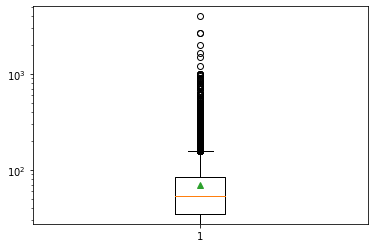

In [167]:
plt.boxplot(cleanedData.price_per_night,  showmeans=True)
plt.yscale('log')
plt.show()

In [168]:
cleanedData = cleanedData[cleanedData.price_per_night< 1150]

I remove highly correlated variables to prevent multicollinearity

In [169]:

corr_matrix = cleanedData.corr().abs()
corr_matrix


,index,years_of_hosting,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,price_per_night,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,shared_bathroom,containsTech,containsToiletries,containsKitchenEssentials,containsClosetEssentials,containsFurniture,containsLaundryServices,containsParking,containsKidFriendly,containsBreakfast,foodAvailable,containsFitness,containsPool,containsSecurity,containsElevator,containsTurndown,containsShuttleService,containsHeatingorAC,petsAllowed
index,1.000000,0.486307,0.007219,0.029692,0.035921,0.062891,0.016688,0.046134,1.653660e-02,3.250467e-02,0.090620,0.035289,0.017353,0.050656,0.110011,0.111025,0.109982,0.036995,0.282140,0.051250,0.028353,1.431173e-02,4.986014e-02,3.746699e-02,6.547378e-02,6.081597e-02,5.438371e-02,1.284519e-02,0.250137,0.092533,0.068685,0.124040,0.049955,1.586826e-02,0.105797,0.027900,0.065265,0.089420,0.183805,0.052293,0.033426,0.009210,0.086012,2.642132e-02,0.048662,0.042312,0.035385,0.002481,0.012911,0.046429,2.030381e-02,0.063454,1.120539e-02
years_of_hosting,0.486307,1.000000,0.007347,0.007378,0.157775,0.048949,0.013292,0.015720,2.289465e-02,4.933920e-03,0.093381,0.032617,0.050814,0.010318,0.086359,0.084678,0.082474,0.072987,0.130662,0.076782,0.023427,1.054459e-01,9.640716e-02,7.806838e-02,8.354804e-02,9.150559e-02,1.283238e-02,7.064489e-02,0.238843,0.023886,0.056315,0.150891,0.064429,5.431853e-02,0.085441,0.029714,0.000821,0.027728,0.061563,0.080714,0.082469,0.029216,0.098502,3.780697e-02,0.001191,0.070965,0.009154,0.038793,0.054835,0.020426,2.865293e-02,0.061209,1.542770e-02
host_is_superhost,0.007219,0.007347,1.000000,0.007570,0.120765,0.017369,0.022491,0.033808,5.886518e-02,1.067853e-02,0.020027,0.009177,0.024641,0.056729,0.165359,0.171906,0.175435,0.188426,0.366557,0.240520,0.093156,1.299433e-01,1.194860e-01,1.409260e-01,1.156926e-01,1.006324e-01,1.168309e-01,1.038034e-01,0.099738,0.024194,0.053130,0.132194,0.017611,3.654691e-01,0.091099,0.018846,0.099562,0.249595,0.099077,0.046466,0.029378,0.149222,0.045745,6.396452e-03,0.023261,0.001315,0.002490,0.083171,0.008932,0.033658,4.954400e-03,0.022372,2.860268e-03
host_listings_count,0.029692,0.007378,0.007570,1.000000,0.024914,0.015778,0.001810,0.007632,6.860840e-03,2.940807e-03,0.026919,0.003369,0.010568,0.004990,0.016260,0.017126,0.016874,0.025712,0.005574,0.002607,0.007737,2.481568e-02,2.020027e-02,1.429111e-02,3.634319e-02,2.595669e-02,6.490907e-03,1.888583e-02,0.042301,0.152049,0.149914,0.023000,0.003293,1.937867e-03,0.007341,0.001225,0.003462,0.016910,0.008532,0.005120,0.010916,0.019926,0.006752,4.816993e-04,0.003793,0.058744,0.004042,0.016107,0.017037,0.001179,1.312025e-04,0.000221,4.915959e-04
host_identity_verified,0.035921,0.157775,0.120765,0.024914,1.000000,0.058965,0.018774,0.028235,1.835565e-02,1.936306e-04,0.022916,0.002934,0.008802,0.051492,0.080451,0.082485,0.082652,0.103221,0.144472,0.104609,0.050397,3.712954e-02,2.731739e-02,4.483179e-02,3.411848e-02,2.733107e-02,5.370888e-02,3.033398e-02,0.046397,0.076159,0.055734,0.101896,0.032121,1.439882e-01,0.027077,0.029871,0.055452,0.112101,0.036314,0.056680,0.025757,0.062616,0.060382,1.209489e-02,0.026089,0.032847,0.018049,0.079945,0.018809,0.009197,9.368151e-03,0.025666,5.408409e-03
neighbourhood_cleansed,0.062891,0.048949,0.017369,0.015778,0.058965,1.000000,0.095037,0.054532,1.258511e-01,1.140632e-01,0.076960,0.007091,0.042952,0.022957,0.019888,0.014976,0.009097,0.023494,0.048284,0.042720,0.039237,5.239836e

Dropping the fields which are very strongly correlated with each other (above 95%)

In [170]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

high_corr = [column for column in upper.columns if any(upper[column] > .95)]

cleanedData = cleanedData.drop(high_corr, axis = 1)


In [171]:
cleanedData.head()

,index,years_of_hosting,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,price_per_night,minimum_nights,maximum_nights,has_availability,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,shared_bathroom,containsTech,containsToiletries,containsKitchenEssentials,containsClosetEssentials,containsFurniture,containsLaundryServices,containsParking,containsKidFriendly,containsBreakfast,foodAvailable,containsFitness,containsPool,containsSecurity,containsElevator,containsTurndown,containsShuttleService,containsHeatingorAC,petsAllowed
0,0,12.391781,1,1.0,1,1,Private room in apartment,2,1.5,1.0,2.0,19.666667,3,1125,1,29,139,278,1,0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1,1,0,1.92,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0
1,1,11.202740,0,2.0,1,2,Private room in townhouse,2,1.0,1.0,1.0,129.000000,1,365,1,0,0,339,19,0,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2,2,0,2.54,0,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0
2,2,11.232877,1,2.0,0,3,Entire apartment,3,1.0,1.0,1.0,8.928571,14,180,1,6,251,5,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,0,0.13,0,1,1,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0
3,3,10.898630,1,1.0,1,3,Private room in houseboat,2,1.5,1.0,1.0,62.500000,2,730,1,27,136,219,6,0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,1,0,1.98,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,4,10.756164,1,2.0,1,2,Private room in apartment,2,1.0,1.0,1.0,37.500000,2,1825,1,30,338,336,13,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2,2,0,2.63,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0


In [172]:
cleanedData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18284 entries, 0 to 18290
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         18284 non-null  int64  
 1   years_of_hosting                              18284 non-null  float64
 2   host_is_superhost                             18284 non-null  int32  
 3   host_listings_count                           18284 non-null  float64
 4   host_identity_verified                        18284 non-null  int32  
 5   neighbourhood_cleansed                        18284 non-null  int64  
 6   property_type                                 18284 non-null  object 
 7   accommodates                                  18284 non-null  int64  
 8   bathrooms                                     18284 non-null  float64
 9   bedrooms                                      18284 non-null 

#### Visualizations

Here, I show the distributions of the prices of air bnbs. I see most are less than 200$ per night. I continue to create visualizations that will help the assessor and other stakeholders understand the data

Limitations:
- There could be more graphs produced 

Assumptions
- I am assuming these are the necessary visuals

Repercussions
- ANy visual I did not include could sway the team

Text(0, 0.5, 'count')

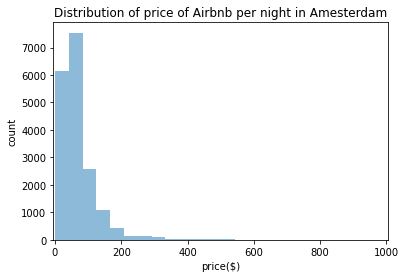

In [174]:
data = np.asarray(cleanedData['price_per_night'])

bins = np.linspace(math.ceil(min(data)), 
                   math.floor(max(data)),25) # fixed number of bins

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Distribution of price of Airbnb per night in Amesterdam')
plt.xlabel('price($)')
plt.ylabel('count')


I zoom in to see the values much more closely

(1.0, 400.0)

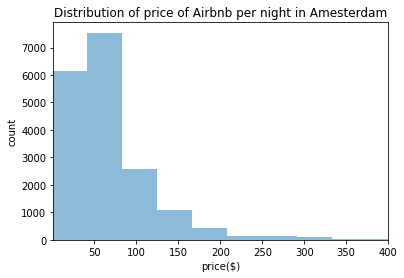

In [175]:
data = np.asarray(cleanedData['price_per_night'])

bins = np.linspace(math.ceil(min(data)), 
                   math.floor(max(data)),25) 



plt.hist(data, bins=bins, alpha=0.5)
plt.title('Distribution of price of Airbnb per night in Amesterdam')
plt.xlabel('price($)')
plt.ylabel('count')
plt.xlim(1, 400)

Here, I show the price by the property type. Prive rooms in apartments, villas and houseboats are most expensive. Knowing this can help investors and the company know where and which type of places to focus their attention on.

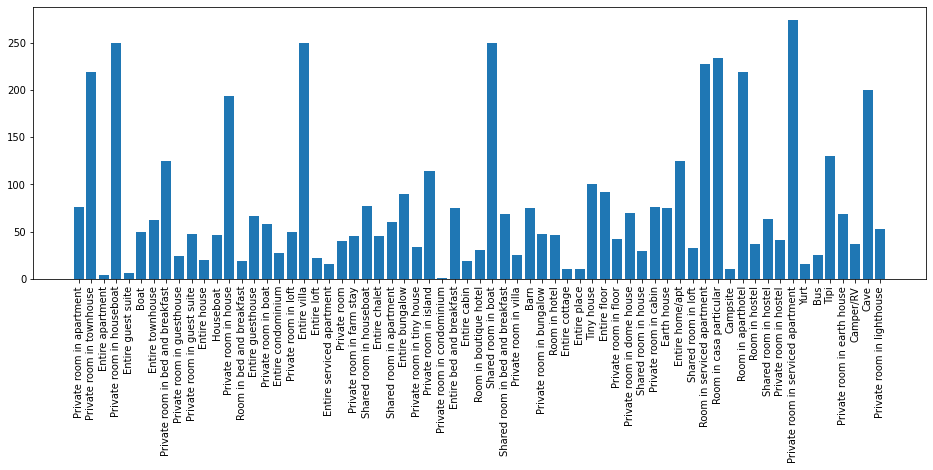

In [176]:
#price vs property type
prices=(cleanedData['price_per_night']).to_list()
prop_type=(cleanedData['property_type']).to_list()
price_prop=list(zip(prop_type,prices))
plt.figure(figsize=(16,5))
ppDict = dict((k, [v[1] for v in itr]) for k, itr in groupby( 
                                price_prop, itemgetter(0)))
for i in ppDict:
    ppDict[i]=sum(ppDict[i])/len(ppDict[i])
plt.bar(range(len(ppDict)), list(ppDict.values()), align='center')
plt.xticks(range(len(ppDict)), list(ppDict.keys()),rotation='vertical')

plt.show()

I show a violin plot of the neighborhood and the price per night.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22')])

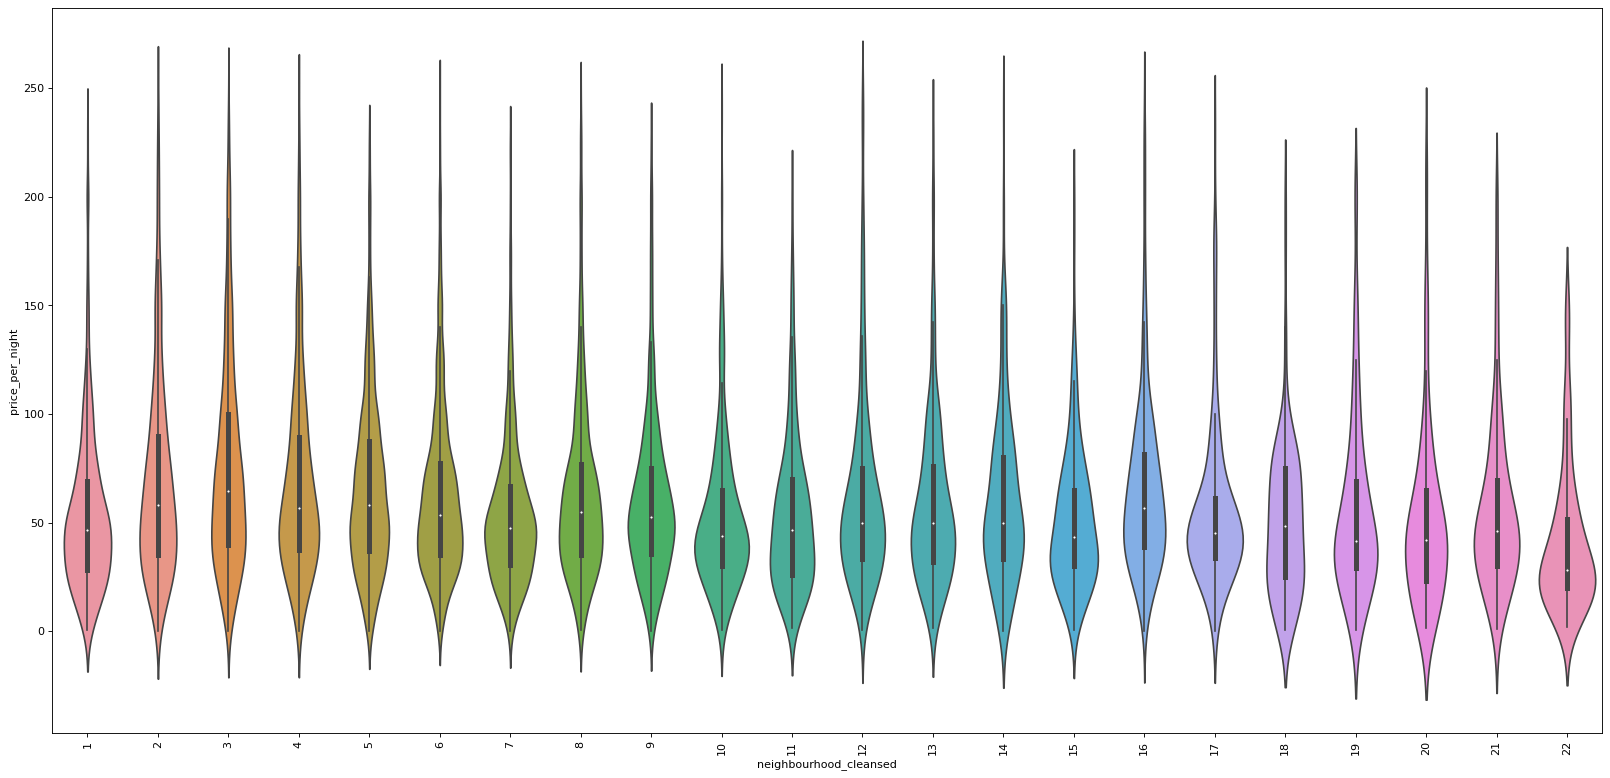

In [177]:
figure(num=None, figsize=(25, 12), dpi=80, facecolor='w', edgecolor='k')

sns.violinplot(y='price_per_night',x='neighbourhood_cleansed',data=cleanedData[cleanedData['price_per_night'] < 
                                                            cleanedData['price_per_night'].quantile(.98)],)

plt.xticks(rotation=90)

#### Worth Exploring?
Conduct tests to determine which variables are worth exploring:

Limitations:
- Some have low correlations because of my cleansing strategies 

Assumptions
- I am assuming my cleaned data is good quality data

Repercussions
- Any repercussion from cleansing could affect the corr matrices

Correlation test
I decided to use relevant feature that have correlation with price greater than 10%

In [178]:
cor = cleanedData.corr()
cor_target = abs(cor["price_per_night"])
# relevant_features = cor_target[cor_target>0.5]
cor_target.sort_values(ascending=False)


price_per_night                                 1.000000
accommodates                                    0.282582
beds                                            0.218002
bedrooms                                        0.189241
bathrooms                                       0.151718
availability_365                                0.111382
availability_30                                 0.102982
minimum_nights                                  0.101550
shared_bathroom                                 0.097908
years_of_hosting                                0.093381
index                                           0.090620
instant_bookable                                0.077760
neighbourhood_cleansed                          0.076960
maximum_nights                                  0.058151
containsKidFriendly                             0.057056
containsPool                                    0.055277
containsKitchenEssentials                       0.052807
containsFitness                

In [179]:
rData=cleanedData[["price_per_night","accommodates","beds","bedrooms","bathrooms","availability_365","availability_30","minimum_nights"]]
rData

,price_per_night,accommodates,beds,bedrooms,bathrooms,availability_365,availability_30,minimum_nights
0,19.666667,2,2.0,1.000000,1.5,139,29,3
1,129.000000,2,1.0,1.000000,1.0,0,0,1
2,8.928571,3,1.0,1.000000,1.0,251,6,14
3,62.500000,2,1.0,1.000000,1.5,136,27,2
4,37.500000,2,1.0,1.000000,1.0,338,30,2
...,...,...,...,...,...,...,...,...
18286,120.000000,2,2.0,1.534405,1.0,86,26,1
18287,32.000000,2,1.0,1.000000,1.0,129,0,1
18288,62.500000,4,4.0,2.000000,1.0,82,22,4
18289,27.500000,3,2.0,1.000000,1.5,48,17,2


### Models using Linear and OLS regression to predict listing price + Good of test fits

I perform linear regression\
First break into the test and train sets where the test is 33% of the data

Limitations:
- There could be limitations in which variables I choose

Assumptions
- I am assuming the results of the correlation test produced the proper variables for these models

Repercussions
- Any mistake in which variables I choose could affect the test of goodness fit


In [180]:
data_Y=pd.DataFrame(rData.iloc[:,0])
data_X=rData.iloc[:,1:]
data_Y
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    data_X, data_Y, test_size = 0.33, random_state = 123)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(12250, 7)
(6034, 7)
(12250, 1)
(6034, 1)


Fit the multi linear regression model 

In [181]:
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train,y_train)
y_test_pred = regr.predict(X_test)
y_train_pred = regr.predict(X_train)

In [182]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_test_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

Coefficients: 
 [[13.919447    0.22035283 -2.24707222  6.17114058  0.04299715  0.25269233
  -0.41983959]]
Mean squared error: 3669.07
Variance score: 0.12


In [183]:
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_train, y_train_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_train, y_train_pred))

Coefficients: 
 [[13.919447    0.22035283 -2.24707222  6.17114058  0.04299715  0.25269233
  -0.41983959]]
Mean squared error: 3751.91
Variance score: 0.10


In [184]:
# test data
pred_actual=pd.DataFrame()
print ('Predicted Price: \n', regr.predict(X_test))
pred_actual['Actual Prices']=y_test['price_per_night'].to_list()
pred_actual['predictedPrice']=regr.predict(X_test)
pred_actual

Predicted Price: 
 [[113.92133231]
 [ 52.37203461]
 [ 54.05139297]
 ...
 [ 53.63155338]
 [ 55.87744449]
 [ 54.05139297]]


,Actual Prices,predictedPrice
0,400.0,113.921332
1,30.0,52.372035
2,30.0,54.051393
3,51.0,82.110640
4,60.0,54.471233
...,...,...
6029,62.5,54.051393
6030,22.0,63.272844
6031,40.0,53.631553
6032,35.0,55.877444


Text(0, 0.5, 'Predicted Price ')

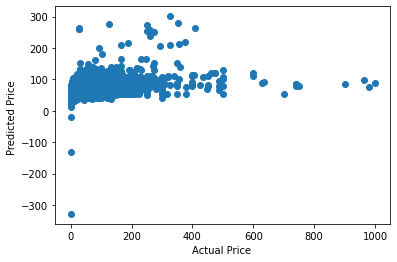

In [185]:
#test of goodness fit
g=plt.scatter(pred_actual['Actual Prices'], pred_actual['predictedPrice'])

g.axes.set_xlabel('Actual Price ')
g.axes.set_ylabel('Predicted Price ')


In [186]:
# train data
pred_actual=pd.DataFrame()
print ('Predicted Price: \n', regr.predict(X_train))
pred_actual['Actual Prices']=y_train['price_per_night'].to_list()
pred_actual['predictedPrice']=regr.predict(X_train)
pred_actual

Predicted Price: 
 [[65.52428098]
 [68.98774985]
 [53.63155338]
 ...
 [95.04017111]
 [53.63155338]
 [82.31012656]]


,Actual Prices,predictedPrice
0,49.666667,65.524281
1,70.000000,68.987750
2,35.666667,53.631553
3,50.000000,54.889891
4,200.000000,54.471233
...,...,...
12245,47.500000,54.051393
12246,12.666667,64.727893
12247,100.000000,95.040171
12248,30.000000,53.631553


Text(0, 0.5, 'Predicted Price ')

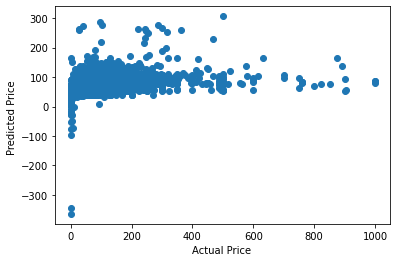

In [187]:
g=plt.scatter(pred_actual['Actual Prices'], pred_actual['predictedPrice'])

g.axes.set_xlabel('Actual Price ')
g.axes.set_ylabel('Predicted Price ')

From above, I see that the variance for the test data is 12% and train data is 10%. These are not very high but are very close to each other. This shows that the model is stable but not strong.

I Build models using OLS regression to predict price. \
I see that the r squared here is 10.5%, very close to what we saw in the multilinear regression.

In [188]:
data_X = sm.add_constant(data_X) # adding a constant
 
model = sm.OLS(data_Y, data_X).fit()
predictions = model.predict(data_X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_per_night   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     307.6
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:06:06   Log-Likelihood:            -1.0111e+05
No. Observations:               18284   AIC:                         2.022e+05
Df Residuals:                   18276   BIC:                         2.023e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               19.1775      1.602     11.969      0.000      16.037      22.318
accommodates        14.3876      0.591     24.334      0.000      13.229      15.547
beds                -0.7440      0.527     -1.411      0.158      -1.777       0.289
bedrooms            -1.3784      0.723     -1.908      0.056      -2.795       0.038
bathrooms            8.5149      1.213      7.020      0.000       6.137      10.892
availability_365     0.0382      0.006      6.248      0.000       0.026       0.050
availability_30      0.2880      0.063      4.564      0.000       0.164       0.412
minimum_nights      -0.4213      0.028    -15.226      0.000      -0.476      -0.367
==============================================================================
Omnibus:                    18869.262   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1829563.553
Skew:                           5.018   Prob(JB):                         0.00
Kurtosis:                      50.967   Cond. No.                         545.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
pred_actual=pd.DataFrame()
print ('Predicted Price: \n', predictions)
pred_actual['Actual Prices']=data_Y['price_per_night'].to_list()
pred_actual['predictedPrices']=predictions
pred_actual

Predicted Price: 
 0        70.261722
1        53.923838
2        74.159321
3        70.736287
4        75.066375
           ...    
18286    63.219783
18287    58.856173
18288    87.296289
18289    78.135096
18290    65.207273
Length: 18284, dtype: float64


,Actual Prices,predictedPrices
0,19.666667,70.261722
1,129.000000,53.923838
2,8.928571,74.159321
3,62.500000,70.736287
4,37.500000,75.066375
...,...,...
18279,120.000000,117.696031
18280,32.000000,89.884230
18281,62.500000,90.301954
18282,27.500000,63.565007


In [190]:
rData

,price_per_night,accommodates,beds,bedrooms,bathrooms,availability_365,availability_30,minimum_nights
0,19.666667,2,2.0,1.000000,1.5,139,29,3
1,129.000000,2,1.0,1.000000,1.0,0,0,1
2,8.928571,3,1.0,1.000000,1.0,251,6,14
3,62.500000,2,1.0,1.000000,1.5,136,27,2
4,37.500000,2,1.0,1.000000,1.0,338,30,2
...,...,...,...,...,...,...,...,...
18286,120.000000,2,2.0,1.534405,1.0,86,26,1
18287,32.000000,2,1.0,1.000000,1.0,129,0,1
18288,62.500000,4,4.0,2.000000,1.0,82,22,4
18289,27.500000,3,2.0,1.000000,1.5,48,17,2


Text(0, 0.5, 'Predicted Price ')

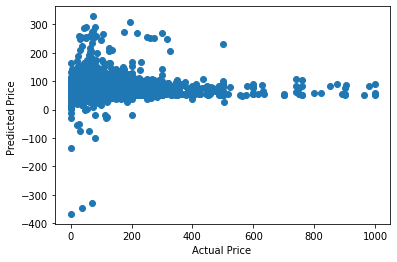

In [191]:
g=plt.scatter(pred_actual['Actual Prices'], pred_actual['predictedPrices'])

g.axes.set_xlabel('Actual Price ')
g.axes.set_ylabel('Predicted Price ')

I have shown above the graph of actual vs predicted prices to visualize the data. Our predicted prices are either a hit or a miss. Some are pretty accuate but a lot a predicted very differently.

### SUMMARY


In this analysis project, I came across many issues relating to data quality such as null values, outliers, data types, and garbage data. I performed exploratory data analysis and cleansed the data. Once the data was clean, I performed some visualizations to understand the data a but better. Lastly, I fit the multilinear regressions models to see how the model performed with the given data and discovered that the models I used were not the strongest. In each step, I explained in detail what I did.
At every step, I have explained the assumptions, limitations, and ramifications of what I did. 
Some repercussions include:
- converting price to price per night
- removing certain columns
- how I handled amenities
I found that predicted prices are either a hit or a miss. Some are pretty accuate but a lot a predicted very differently and that the accuracy is only 10 percent.
I permoed the test of goodness and showed the plots at the end of the regression models.